In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Poshmark Data Analytics: EDA

This project aims to explore what's selling on poshmark, sell-through rates for specific products, and the best brands and products to source for resellers on Poshmark. Data was ethically sourced through web-scraping on Poshmark with a script that follows the site's scraping guidlines outlined in the **Robots.txt** file.

The data contains information about sold listings on Poshmark. I chose a few categories to scrape and do analyses on instead of selecting from all sold listings on Poshmark, as I wanted to focus on Women's clothing and exclude home and makeup items from the analysis. The categories are: tops, dresses, bags, jeans and skirts.

*For privacy protection, my scraping script is located in a separate directory, and I will remove usernames and the links to specific products from the dataframes before analyses; these columns were used as primary keys to identify unique listings but are not necessary for the data analysis.*

### 1. Opening the Files

In [138]:
tops = pd.read_csv(os.path.expanduser('~/Desktop/data/listings-tops.csv'))

In [139]:
tops = tops.drop(columns = ['link','user'])

In [140]:
tops

,name,sold price,original price,post_date,size,brand,categories,color(s),sold date,nwt,boutique
0,PLUS WASHED SHORT SLEEVE TOP WITH POCKETS 1 XL,$15,NaN,2025-04-26,1X,Zenana Outfitters,"['Women', 'Tops']","['Green', 'Blue']",05-28-2025,0.0,NaN
1,Quince Women's 100% European Linen Fitted Tank...,$23,$39,2025-05-28,XS,Quince,"['Women', 'Tops']",['White'],05-28-2025,0.0,NaN
2,Quince Women'ss 100% European Linen Vest Oatme...,$21,$39,2025-05-28,M,Quince,"['Women', 'Tops']",['Black'],05-28-2025,0.0,NaN
3,Lululemon Ribbed Tanktops,$20,$68,2024-06-26,6,lululemon athletica,"['Women', 'Tops']",['Black'],05-28-2025,0.0,NaN
4,NWT - Equipment - Slim Signature Long Sleeve P...,$100,$280,2023-09-04,L,Equipment,"['Women', 'Tops']",['Blue'],05-28-2025,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10054,❤️POL “ Maui” Open Front Tunic Top Cardigan wi...,$50,NaN,2025-01-19,L,POL,['tops'],[],06-03-2025,0.0,1.0
10055,Free People - Movement - Washed Black Hot Shot...,$60,$70,2024-10-29,M,Free People,['tops'],['black'],06-03-2025,0.0,0.0
10056,Floral Hoodie Sweatshirt NWT,$40,$78,2025-04-28,M,Pretty Garbage,['tops'],[],06-03-2025,0.0,1.0
10057,Wild Fable - Women's Wide Crewneck Americana P...,$17,$30,2025-06-03,S,Wild Fable,['tops'],['red'],06-03-2025,1.0,0.0


### 2. Data Description

Columns:

1. **name**: The name of the listing as it appears on the listing's title.

2. **sold price**: The price the item sold for on Poshmark.

3. **original price**: The price the seller indicated was the original retail price of the item. 
    -- *Limitations:* This information may be inaccurate as it is user-provided, and some listings do not specify an original price.

4. **post_date**: The date the listing was sold to a buyer.

5. **size**: Size of the garmet if applicable.

6. **brand**: Brand of the garmet if applicable.

7. **categories**: Categories of the item.

8. **color(s)**: Colors of the item as outlined in the name. 
    -- *Limitations:* The color is only added to this list if there are mentions of a color in the name.

9. **sold_date**: The inferred sold date of the listing.
    -- *Limitations:* The sold date is inferred based on when the listing was added to the recently sold items page.

10. **nwt**: Whether an item is "New with Tags". 

11. **boutique**: Whether an item was sold from a Boutique, which is a shop that resells clothing sourced from wholesalers rather than used clothing or clothing sourced elsewhere.

In [141]:
tops.columns

Index(['name', 'sold price', 'original price', 'post_date', 'size', 'brand',
       'categories', 'color(s)', 'sold date', 'nwt', 'boutique'],
      dtype='object')

### 3. Data Cleaning

Cleaning Tasks:
* Convert numeric columns to correct datatypes.
* Explode the color column for color analyses.
* Convert dates to datetime objects.

In [142]:
tops['sold price'] = tops['sold price'].str.replace(',','').str.strip('$').astype('Int64')
tops['original price'] = tops['original price'].str.replace(',','').str.strip('$').astype('Int64') 

In [143]:
tops['sold date'] = pd.to_datetime(tops['sold date'], format='%m-%d-%Y', errors='coerce')
tops['post_date'] = pd.to_datetime(tops['post_date'], format='%Y-%m-%d', errors='coerce')

In [144]:
tops.head(5)

,name,sold price,original price,post_date,size,brand,categories,color(s),sold date,nwt,boutique
0,PLUS WASHED SHORT SLEEVE TOP WITH POCKETS 1 XL,15,<NA>,2025-04-26,1X,Zenana Outfitters,"['Women', 'Tops']","['Green', 'Blue']",2025-05-28,0.0,NaN
1,Quince Women's 100% European Linen Fitted Tank...,23,39,2025-05-28,XS,Quince,"['Women', 'Tops']",['White'],2025-05-28,0.0,NaN
2,Quince Women'ss 100% European Linen Vest Oatme...,21,39,2025-05-28,M,Quince,"['Women', 'Tops']",['Black'],2025-05-28,0.0,NaN
3,Lululemon Ribbed Tanktops,20,68,2024-06-26,6,lululemon athletica,"['Women', 'Tops']",['Black'],2025-05-28,0.0,NaN
4,NWT - Equipment - Slim Signature Long Sleeve P...,100,280,2023-09-04,L,Equipment,"['Women', 'Tops']",['Blue'],2025-05-28,1.0,NaN


## 4. Top Performing Brands

Identifying the top-performing brands based on popularity.

In [145]:
# top 10 brands by number of sold listings
top_brands = tops['brand'].value_counts().head(12).index
popular_brand_df = tops[tops['brand'].isin(top_brands)]

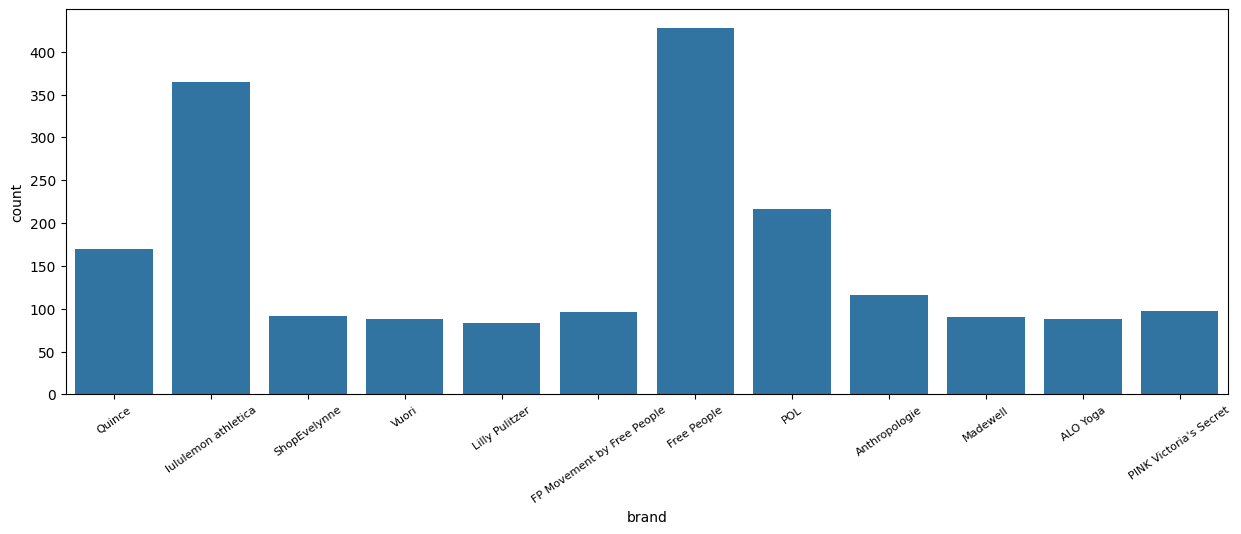

In [146]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=35, fontsize=8)

ax = sns.countplot(data=popular_brand_df, x='brand')

### 5. Brands with Quickest Sell-through Rate

Identifying the brands that sell the fastest, on average.

In [147]:
tops['days to sell'] = (tops['sold date'] - tops['post_date']).dt.days

In [148]:
brand_counts = tops['brand'].value_counts()
brands_over_20 = brand_counts[brand_counts > 20].index

tops_filtered = tops[tops['brand'].isin(brands_over_20)].sort_values(by='days to sell', ascending=True)

fastest_brands = tops_filtered.groupby('brand')['days to sell'].agg('mean').sort_values(ascending=True).reset_index()

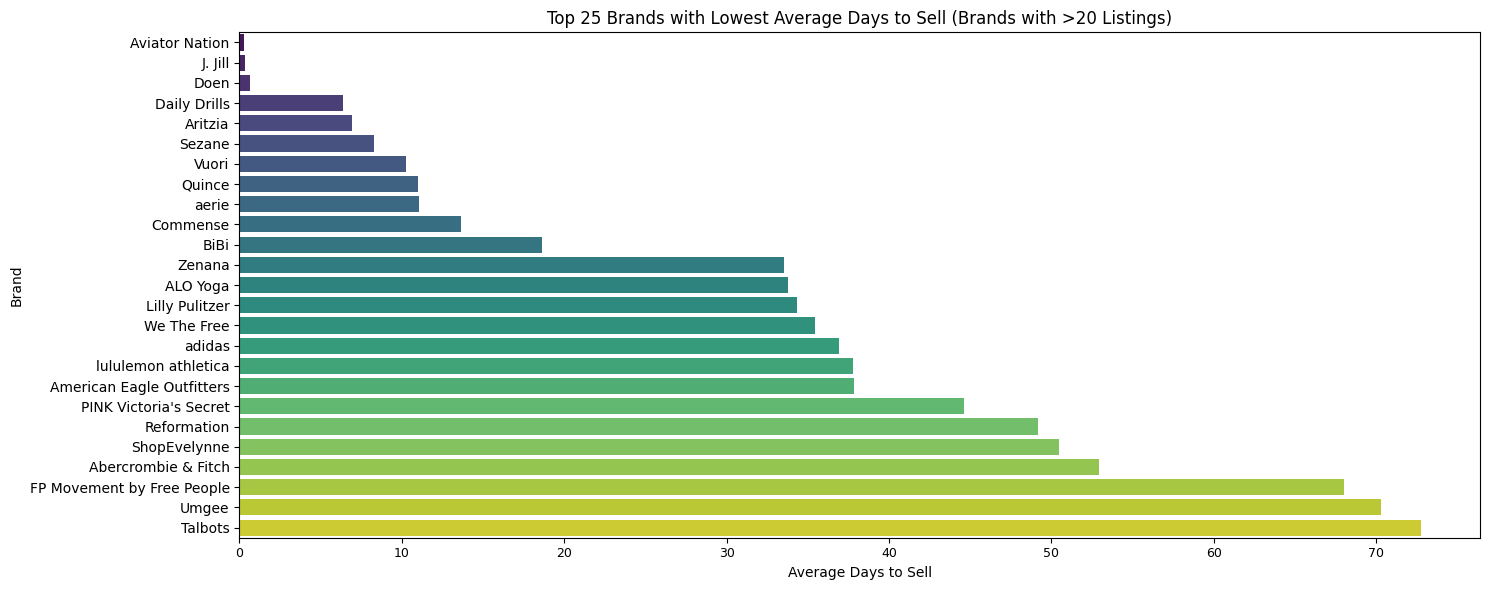

In [156]:
top_25_fastest = fastest_brands[:25]

plt.figure(figsize=(15, 6))
sns.barplot(data=top_25_fastest, x='days to sell', y='brand', palette='viridis')

plt.title('Top 25 Brands with Lowest Average Days to Sell (Brands with >20 Listings)')
plt.xlabel('Average Days to Sell')
plt.xticks(fontsize=9)
plt.ylabel('Brand')

plt.tight_layout()
plt.show()

#### Removing Outliers

A top-selling brand, *Free People*, is not included in the quickest days to sell although some of its child-brands, *FP Movement by Free People* and *We The Free* are. This indicates that there may be some extreme outliers in the 'days to sell' column, which should be removed for a better visualization.

<Axes: ylabel='days to sell'>

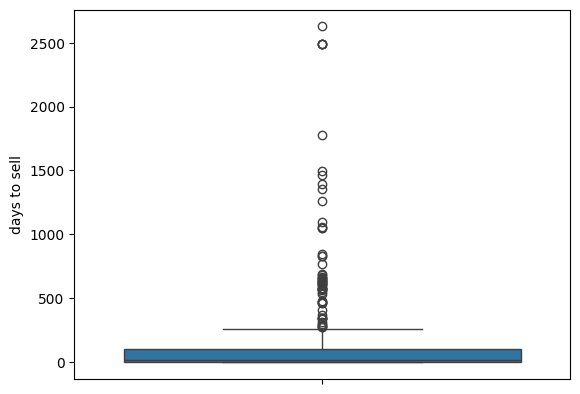

In [154]:
sns.boxplot(tops_filtered[tops_filtered['brand'] == 'Free People']['days to sell'])